
# Project: Investigate a Dataset - tmdb-movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

##### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The columns are:
homepage

id - unique identifiers for each movie

imdb_id - the id given by imdb website

original_title - The original title of the movie

overview - Brief movie description

popularity - The popularity of the movie in measurable numerical representation

production_companies - companies involved in movie production

release_date - date movie was released

keywords - important words releated to movie

genres - genres of the movie

tagline - brief single sentence description.

vote_average - average votes of the movie

cast - The movies cast

director - movies director

revenue - revenue gotten from the movie

budget - the budget used in making the movie

revenue_adj - the revenue after taking the inflation rates of 2020 into account

budget_adj - the budget after taking the inflation rates of 2020 into account

### Question(s) for Analysis
#### Which genres are most popular from year to year? 
#### What kinds of properties are associated with movies that have high revenues?
#### What properties affect the average rating of a movie
#### Are particular production companies associated with popular or good movies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [3]:
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
 

I am going to drop some columns including cast,homepage,director,tagline,id,imdb_id,overview,keywords
I am also dropping budget and revenue because their information can already be captured by the revenue_adj and budget_adj columns which have also taken the inflation rate into consideration.
I am also dropping the vote count because the vote average is derived from it and so captures the information from the votecount

In [8]:
df.drop(['cast','homepage','director','tagline','id','imdb_id','budget','revenue','overview','keywords','vote_count'],axis=1,inplace=True)

In [9]:
df.head(2)

popularity      original_title  runtime  \
0   32.985763      Jurassic World      124   
1   28.419936  Mad Max: Fury Road      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08

drop null values because most of them occur in the production company column and can not be inferred we can either choose to drop the columns itself or the rows, i intend to drop the rows

In [10]:
df.dropna(inplace=False)

popularity                                    original_title  runtime  \
0       32.985763                                    Jurassic World      124   
1       28.419936                                Mad Max: Fury Road      120   
2       13.112507                                         Insurgent      119   
3       11.173104                      Star Wars: The Force Awakens      136   
4        9.335014                                         Furious 7      137   
5        9.110700                                      The Revenant      156   
6        8.654359                                Terminator Genisys      125   
7        7.667400                                       The Martian      141   
8        7.404165                                           Minions       91   
9        6.326804                                        Inside Out       94   
10       6.200282                                           Spectre      148   
11       6.189369                                 Jupiter Ascending      124   
12       6.118847                                        Ex Machina      108   
13       5.984995                                            Pixels      105   
14       5.944927                           Avengers: Age of Ultron      141   
15       5.898400                                 The Hateful Eight      167   
16       5.749758                                           Taken 3      109   
17       5.573184                                           Ant-Man      115   
18       5.556818                                        Cinderella      112   
19       5.476958             The Hunger Games: Mockingjay - Part 2      136   
20       5.462138                                      Tomorrowland      130   
21       5.337064                                          Southpaw      123   
22       4.907832                                       San Andreas      114   
23       4.710402                              Fifty Shades of Grey      125   
24       4.648046                                     The Big Short      130   
25       4.566713                Mission: Impossible - Rogue Nation      131   
26       4.564549                                             Ted 2      115   
27       4.503789                      Kingsman: The Secret Service      130   
28       4.062293                                         Spotlight      128   
29       3.968891                    Maze Runner: The Scorch Trials      132   
...           ...                                               ...      ...   
10834    0.310688                               Return of the Seven       95   
10835    0.299911                                  The Sand Pebbles      182   
10836    0.239435                                    Walk Don't Run      114   
10837    0.291704                                      The Blue Max      156   
10838    0.151845                                 The Professionals      117   
10839    0.276133             It's the Great Pumpkin, Charlie Brown       25   
10840    0.102530                                 Funeral in Berlin      102   
10841    0.264925                                      The Shooting       82   
10843    0.252399                                          Khartoum      134   
10844    0.236098                                     Our Man Flint      108   
10845    0.230873                                   Carry On Cowboy       93   
10846    0.212716                       Dracula: Prince of Darkness       90   
10847    0.034555                                  Island of Terror       89   
10848    0.207257                                  Fantastic Voyage      100   
10849    0.206537                                            Gambit      109   
10850    0.202473                                            Harper      121   
10851    0.342791                                         Born Free       95   
10852    0.227220                    A Big Hand for the Little Lady       95   
10854  

i want to separate the genres for each movie and create new rows for each first genre as i will be assuming that as the main genre of the movie

I have to remove the rows with a float value first

In [11]:
df['types']=df['genres'].apply(lambda x: type(x))

In [12]:
flo=df[df['types']==float]

In [13]:
df=df.drop(flo.index,axis=0).reset_index()

In [14]:
df=df.drop(['types'],axis=1)

In [15]:
df.shape

(10843, 11)

for each movie that has multiple genres the first will be chosen

In [16]:
df['genres']=df['genres'].apply(lambda x:x.split('|')[0] if '|' in x else x)

do the same for production_companies
first remove float the take the first production company

In [17]:
df['types']=df['production_companies'].apply(lambda x: type(x))

In [18]:
flo=df[df['types']==float]

In [19]:
df=df.drop(flo.index,axis=0).reset_index()

In [20]:
df=df.drop(['types'],axis=1)

In [21]:
df['production_companies']=df['production_companies'].apply(lambda x:x.split('|')[0] if '|' in x else x)

In [22]:
df.head()

level_0  index  popularity                original_title  runtime  \
0        0      0   32.985763                Jurassic World      124   
1        1      1   28.419936            Mad Max: Fury Road      120   
2        2      2   13.112507                     Insurgent      119   
3        3      3   11.173104  Star Wars: The Force Awakens      136   
4        4      4    9.335014                     Furious 7      137   

      genres       production_companies release_date  vote_average  \
0     Action          Universal Studios       6/9/15           6.5   
1     Action  Village Roadshow Pictures      5/13/15           7.1   
2  Adventure       Summit Entertainment      3/18/15           6.3   
3     Action                  Lucasfilm     12/15/15           7.5   
4     Action         Universal Pictures       4/1/15           7.3   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
1          2015  1.379999e+08  3.481613e+08  
2          2015  1.012000e+08  2.716190e+08  
3          2015  1.839999e+08  1.902723e+09  
4          2015  1.747999e+08  1.385749e+09

i would also want to know if the release month has any effect on how the movie performs in the market

In [23]:
df['release_month']=df['release_date'].apply(lambda x:x.split('/')[0])

In [24]:
df['release_month'].nunique()

12

In [25]:
df.drop('release_date',axis=1,inplace=True)

In [26]:
df.drop(['level_0','index'],axis=1,inplace=True)

In [27]:
df.head()

popularity                original_title  runtime     genres  \
0   32.985763                Jurassic World      124     Action   
1   28.419936            Mad Max: Fury Road      120     Action   
2   13.112507                     Insurgent      119  Adventure   
3   11.173104  Star Wars: The Force Awakens      136     Action   
4    9.335014                     Furious 7      137     Action   

        production_companies  vote_average  release_year    budget_adj  \
0          Universal Studios           6.5          2015  1.379999e+08   
1  Village Roadshow Pictures           7.1          2015  1.379999e+08   
2       Summit Entertainment           6.3          2015  1.012000e+08   
3                  Lucasfilm           7.5          2015  1.839999e+08   
4         Universal Pictures           7.3          2015  1.747999e+08   

    revenue_adj release_month  
0  1.392446e+09             6  
1  3.481613e+08             5  
2  2.716190e+08             3  
3  1.902723e+09            12  
4  1.385749e+09             4

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year? 


In [28]:
popular=df.groupby(['release_year','genres']).mean()['popularity']

In [29]:
new_df={'year':[],'genre':[],'popularity':[]}
for year in df['release_year'].unique():
    genre=popular[year].sort_values(ascending=False).index[0]
    new_df['year'].append(year)
    new_df['genre'].append(genre)
    new_df['popularity'].append(popular.loc[year,genre])

The most popular movie genres for each year can be given as

In [30]:
pop=pd.DataFrame(new_df)
pop

year            genre  popularity
0   2015          Western    4.929120
1   2014        Adventure    2.441165
2   1977        Adventure    3.762110
3   2009          Romance    1.806676
4   2010        Adventure    1.660264
5   1999          Mystery    2.578731
6   2001          History    2.478879
7   2008        Adventure    1.163685
8   2011          Romance    1.401397
9   2002        Adventure    2.003779
10  1994         Thriller    2.032053
11  2012          Fantasy    1.524922
12  2003        Adventure    2.472333
13  1997        Animation    1.326255
14  2013  Science Fiction    1.959016
15  1985        Adventure    1.056025
16  2005        Adventure    1.377486
17  2006          Fantasy    1.361126
18  2004  Science Fiction    2.050361
19  1972            Drama    1.495163
20  1980            Music    1.607219
21  2007        Adventure    1.194394
22  1979           Horror    1.021005
23  1984          Fantasy    1.115827
24  1983        Adventure    1.666077
25  1995        Animation    2.554363
26  1992        Animation    1.535277
27  1981        Adventure    1.359776
28  1996  Science Fiction    1.323991
29  2000           Family    1.373292
30  1982  Science Fiction    1.685049
31  1998  Science Fiction    1.260368
32  1989        Animation    1.685298
33  1991          Romance    3.852269
34  1988          Fantasy    0.952525
35  1987  Science Fiction    1.960956
36  1968  Science Fiction    2.088194
37  1974        Adventure    0.842025
38  1975            Drama    1.044668
39  1962        Adventure    1.283631
40  1964        Adventure    0.736431
41  1971           Family    2.430667
42  1990          Romance    0.922730
43  1961        Adventure    1.394596
44  1960            Drama    0.687575
45  1976            Crime    2.582657
46  1993        Adventure    1.126936
47  1967           Family    2.550704
48  1963        Animation    2.180410
49  1986        Adventure    0.790314
50  1973        Adventure    1.549139
51  1970        Animation    1.936962
52  1965        Adventure    1.121328
53  1969          History    1.357317
54  1978            Music    1.697618
55  1966        Animation    1.227582

let's see the number of occurrences for the most popular genres for each movie over the years

In [31]:
occurences=pop.groupby('genre').count()['popularity']
occurences

genre
Adventure          19
Animation           7
Crime               1
Drama               3
Family              3
Fantasy             4
History             2
Horror              1
Music               2
Mystery             1
Romance             4
Science Fiction     7
Thriller            1
Western             1
Name: popularity, dtype: int64

In [32]:
def plot_bar(input_x,input_y,color='blue',xlabel='x',ylabel='y', title='x vs y',rotation=0):
    plt.bar(input_x,input_y,color=color)
    plt.xticks(rotation=rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

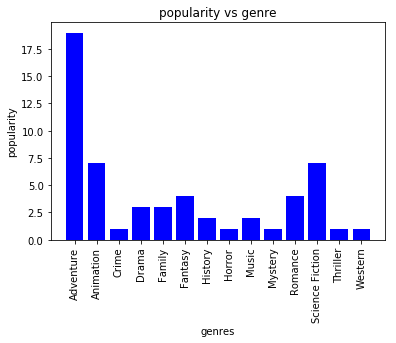

In [33]:
plot_bar(occurences.index,occurences,xlabel='genres',ylabel='popularity', title='popularity vs genre',rotation=90)

Adventure movies seem to be the most popular movies

I want to see if adventure is so high because it simply occurs most each year
but this seems not to be the case

In [34]:
df.groupby(['genres']).count()['popularity'].sort_values(ascending=False)

genres
Drama              2228
Comedy             2087
Action             1481
Horror              853
Adventure           551
Thriller            474
Animation           364
Crime               362
Documentary         283
Fantasy             254
Science Fiction     197
Romance             161
Family              128
Mystery             118
Music                80
TV Movie             62
War                  57
Western              42
History              39
Foreign               6
Name: popularity, dtype: int64

The above cell shows that adventure movies dont have the highest count and so its popularity might not be attributed to the number of adventure movies released each year

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

To be able analyze the revenue we have to split into distinguishable parts

In [35]:
df['new_revenue']=pd.cut(df['revenue_adj'],[0,4.248161e+07,2.827124e+09],labels=['low','high'])

In [36]:
df.groupby('new_revenue').mean()

popularity     runtime  vote_average  release_year    budget_adj  \
new_revenue                                                                     
low            0.592284  103.410535      6.000609   2002.538964  1.428343e+07   
high           1.499643  112.590965      6.290069   1999.238502  5.591679e+07   

              revenue_adj  
new_revenue                
low          1.410839e+07  
high         2.137273e+08

High budget and high runtime on average seems to have a positive correlation with the revenue

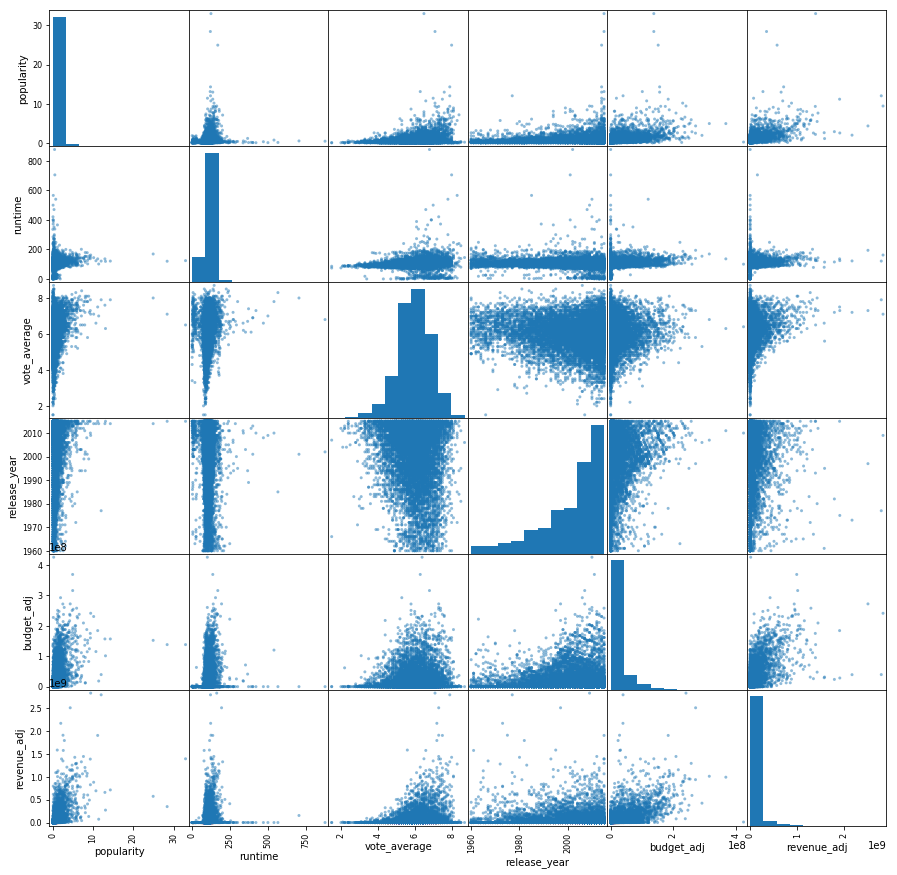

In [37]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

the plot above shows the correlation of the revenue and budget
This means that a movie with a large budget might bring in more revenue

In [38]:
month=df.groupby('release_month',as_index=False).mean()
month['release_month']=month['release_month'].astype(int)
month=month.sort_values('release_month')
month

release_month  popularity     runtime  vote_average  release_year  \
0               1    0.518669   97.653897      5.824306   2002.848085   
4               2    0.625591  101.475358      5.928776   2001.704293   
5               3    0.692743  102.202957      5.927823   2000.938172   
6               4    0.599353  100.529655      5.870069   2001.951724   
7               5    0.800337  105.376011      5.983288   2001.008086   
8               6    0.848089  102.911573      6.016385   1998.076723   
9               7    0.809261  102.257660      5.932451   1999.472145   
10              8    0.614468   98.778563      5.825206   2001.586572   
11              9    0.597369  104.813896      6.050289   2003.716294   
1              10    0.652551  100.780019      5.938809   2001.183477   
2              11    0.798405  102.530283      6.065276   2000.323015   
3              12    0.799952  110.851276      6.178801   1997.049945   

      budget_adj   revenue_adj  
0   9.323359e+06  2.291387e+07  
4   1.702730e+07  3.727912e+07  
5   1.858316e+07  5.458318e+07  
6   1.670831e+07  4.363039e+07  
7   2.507146e+07  8.310995e+07  
8   2.930083e+07  1.049230e+08  
9   2.544404e+07  8.149049e+07  
10  1.541850e+07  3.826314e+07  
11  1.199907e+07  2.553676e+07  
1   1.510713e+07  3.686822e+07  
2   2.479664e+07  7.871890e+07  
3   2.767088e+07  9.257252e+07

In [39]:
input_x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
input_y=month['revenue_adj']

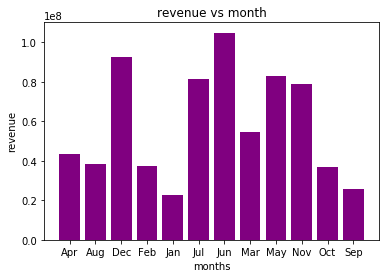

In [40]:
plot_bar(input_x,input_y,color='purple',xlabel='months',ylabel='revenue',title='revenue vs month')

The months do affect the revenue and we see that june and december have the higher revenues which is understandable for december since it is associated with free time and public holidays.

### What properties affect the average rating of a movie

In [41]:
df.describe()

popularity      runtime  vote_average  release_year    budget_adj  \
count  9827.000000  9827.000000   9827.000000   9827.000000  9.827000e+03   
mean      0.692004   102.673858      5.967874   2000.904142  1.931318e+07   
std       1.034731    28.201627      0.914524     13.032228  3.559418e+07   
min       0.000188     0.000000      1.500000   1960.000000  0.000000e+00   
25%       0.230927    90.000000      5.400000   1994.000000  0.000000e+00   
50%       0.417317   100.000000      6.000000   2005.000000  2.025573e+05   
75%       0.773583   112.000000      6.600000   2011.000000  2.432644e+07   
max      32.985763   877.000000      8.700000   2015.000000  4.250000e+08   

        revenue_adj  
count  9.827000e+03  
mean   5.673501e+07  
std    1.510850e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    4.248161e+07  
max    2.827124e+09

lets separate the average ratings of the movie

In [42]:
df['ave_rating_cut']=pd.cut(df['vote_average'],[1.5,5.4,6,6.6,8.7],labels=['low','low medium','medium','high'])

In [43]:
ave_rate=df.groupby('ave_rating_cut').mean()
ave_rate

popularity     runtime  vote_average  release_year  \
ave_rating_cut                                                       
low               0.442662   95.640138      4.807766   2003.820069   
low medium        0.580030  101.223042      5.765109   2000.962690   
medium            0.748171  105.810992      6.341993   1999.578094   
high              1.038113  108.855053      7.109176   1998.978280   

                  budget_adj   revenue_adj  
ave_rating_cut                              
low             1.351071e+07  1.734725e+07  
low medium      1.983570e+07  4.590931e+07  
medium          2.276250e+07  6.883293e+07  
high            2.158843e+07  1.003384e+08

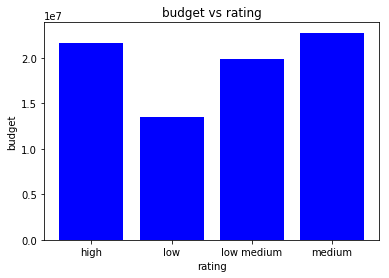

In [44]:
plot_bar(ave_rate.index,ave_rate['budget_adj'],color='blue',xlabel='rating',ylabel='budget', title='budget vs rating',rotation=0)


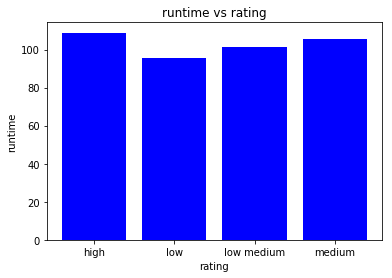

In [45]:
plot_bar(ave_rate.index,ave_rate['runtime'],xlabel='rating',ylabel='runtime', title='runtime vs rating',rotation=0)

high runtime and moderate to high budgets seem to be related to good movie vote averages

### Are particular production companies associated with popular or good movies ?

In [46]:
#firstly i want to get production companies that have released more movies
#the count seems to be skewed with 75 percent of companies having less than 3 movies
df.groupby('production_companies').count()['popularity'].describe()

count    3053.000000
mean        3.218801
std        15.892845
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       460.000000
Name: popularity, dtype: float64

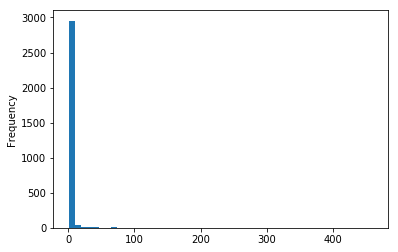

In [47]:
df.groupby('production_companies').count()['popularity'].plot(kind='hist',bins=50)

I will be using 1/20 of the maximum movies as the cut off

In [48]:
ans=df.groupby('production_companies',as_index=False).count()
companies = ans[ans['popularity']>460/20][['production_companies','popularity']].rename(columns={'popularity':'no_of_movies'})

In [49]:
comp=pd.merge(companies,df,left_on='production_companies',right_on='production_companies',suffixes=('_comp','_df'))

In [50]:
comp=comp.groupby('production_companies').mean().sort_values(['no_of_movies','popularity'],ascending=False)[['no_of_movies','popularity','budget_adj']]
comp

no_of_movies  popularity    budget_adj
production_companies                                                          
Universal Pictures                             460.0    0.932852  3.289291e+07
Paramount Pictures                             426.0    0.948539  3.936982e+07
Columbia Pictures                              271.0    1.044114  4.671745e+07
Twentieth Century Fox Film Corporation         242.0    1.055127  3.874356e+07
Walt Disney Pictures                           213.0    1.388293  5.515396e+07
New Line Cinema                                206.0    0.943631  2.906106e+07
Warner Bros.                                   172.0    0.681820  2.607068e+07
Miramax Films                                  132.0    0.799846  1.806661e+07
TriStar Pictures                               121.0    0.596925  2.551258e+07
Columbia Pictures Corporation                  119.0    0.667477  3.277803e+07
Metro-Goldwyn-Mayer (MGM)                      104.0    0.485427  1.816243e+07
20th Century Fox                                88.0    0.506901  2.336078e+07
Village Roadshow Pictures                       79.0    1.787683  6.853787e+07
DreamWorks SKG                                  73.0    1.273053  5.575734e+07
United Artists                                  73.0    0.642316  2.177608e+07
Touchstone Pictures                             72.0    0.552975  2.561741e+07
Orion Pictures                                  70.0    0.534787  1.214384e+07
BBC Films                                       69.0    0.572702  4.411345e+06
Fox Searchlight Pictures                        68.0    0.824184  1.014301e+07
Lions Gate Films                                52.0    0.459146  1.080591e+07
Summit Entertainment                            46.0    1.974769  3.553610e+07
Regency Enterprises                             46.0    1.235697  4.195348e+07
Imagine Entertainment                           45.0    0.979395  5.715409e+07
DC Comics                                       44.0    0.875115  2.104190e+07
Dimension Films                                 41.0    0.693359  2.037618e+07
Warner Bros. Pictures                           39.0    0.450866  1.707531e+07
Lionsgate                                       37.0    1.240948  1.955101e+07
Hollywood Pictures                              36.0    0.492779  3.225741e+07
The Weinstein Company                           35.0    1.046692  2.271841e+07
Castle Rock Entertainment                       35.0    0.968028  2.507073e+07
DreamWorks Animation                            34.0    1.273157  6.970365e+07
Lakeshore Entertainment                         33.0    1.518645  2.747978e+07
The Asylum                                      31.0    0.300701  9.827788e+04
Pixar Animation Studios                         30.0    0.466315  0.000000e+00
Walt Disney Productions                         29.0    0.778804  1.394820e+07
StudioCanal                                     29.0    0.722700  1.347510e+07
Marvel Studios                                  27.0    3.221313  6.924192e+07
Fox 2000 Pictures                               27.0    0.934335  2.726871e+07
New World Pictures                              27.0    0.306868  1.910416e+06
Gaumont                                         25.0    0.454066  6.810595e+06
Disney Channel                                  24.0    0.378189  4.597094e+05

In [51]:
comp['budget_adj'].mean() > df.budget_adj.mean()

True

with the average popularity being 0.69 and the average budget as 1.9e+7 it is possible that the bigger companies which have a larger budget on average than the average total budget produce more popular movies

<a id='conclusions'></a>
## Conclusions

#### 1 Adventure movies seem to have occured the most times as the most popular genre. This might not be accurate since many movies have sub-genres and this was not fully explored
#### 2 High budget and high runtime on average seems to have a positive correlation with the revenue
#### 3 The release months do affect the revenue
#### 4 High runtime and moderate to high budgets seem to be related to good movie vote averages
#### 5 With the average popularity being 0.69 and the average budget as 1.9e+7 it is possible that the bigger companies which have a larger budget on average than the average total budget produce more popular movies



## Limitations

#### 1 The missing data which occurred largely in the production company column led to loss of important data after those rows were dropped.
#### 2 The dataset does not mention if  all the movies released by all the production companies have been listed.
#### 3 The dataset does not specify the range of the vote average, for example if it's on a 1 to 10 rating or maybe 1 to 15 rating.


In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0